# Test 

In [4]:
import torch
import torch_geometric
from torch_geometric.datasets import Planetoid
import torch_geometric.utils as pygu

In [22]:
dataset = Planetoid(root="Testnb",name= "Cora")
print(dataset)
print("number of graphs:\t\t",len(dataset))
print("number of classes:\t\t",dataset.num_classes)
print("number of node features:\t",dataset.num_node_features)
print("number of edge features:\t",dataset.num_edge_features)

Cora()
number of graphs:		 1
number of classes:		 7
number of node features:	 1433
number of edge features:	 0


In [4]:
print(dataset.data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


/opt/anaconda3/envs/testNeuro/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [3]:
import torch_geometric.utils as pygu
pygu.contains_self_loops(dataset.edge_index)

NameError: name 'dataset' is not defined

In [6]:
dataset.edge_index[:,:10]

tensor([[ 633, 1862, 2582,    2,  652,  654,    1,  332, 1454, 1666],
        [   0,    0,    0,    1,    1,    1,    2,    2,    2,    2]])

In [7]:
dataset.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [12]:
x = torch.tensor([[1,2,3,4],[5,6,7,8]])
print(x)
print(x.dim())
print("0")
print(x.unsqueeze(0))
print("1")
print(x.unsqueeze(1))
print("-1 = 2")
print(x.unsqueeze(-1))
print("0 + -1")
print(x.unsqueeze(0).unsqueeze(-1))


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
2
0
tensor([[[1, 2, 3, 4],
         [5, 6, 7, 8]]])
1
tensor([[[1, 2, 3, 4]],

        [[5, 6, 7, 8]]])
-1 = 2
tensor([[[1],
         [2],
         [3],
         [4]],

        [[5],
         [6],
         [7],
         [8]]])
0 + -1
tensor([[[[1],
          [2],
          [3],
          [4]],

         [[5],
          [6],
          [7],
          [8]]]])


In [20]:
x = torch.tensor([1,2,3,4]).unsqueeze(1)
print(x)
print("cat without dimension : ", torch.cat((x,x)))
torch.cat((x,x),1)

tensor([[1],
        [2],
        [3],
        [4]])
cat without dimension :  tensor([[1],
        [2],
        [3],
        [4],
        [1],
        [2],
        [3],
        [4]])


tensor([[1, 1],
        [2, 2],
        [3, 3],
        [4, 4]])

In [6]:
from models.NM import NeuroMatchNetwork 
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root="/tmp/ENZYMES", name="ENZYMES")
testNMN = NeuroMatchNetwork()
print(testNMN)

NeuroMatchNetwork(
  (pre_mp): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
  )
  (convs): ModuleList(
    (0): SAGEConv(64, 64, aggr=sum)
    (1): SAGEConv(128, 64, aggr=sum)
    (2): SAGEConv(192, 64, aggr=sum)
    (3): SAGEConv(256, 64, aggr=sum)
    (4): SAGEConv(320, 64, aggr=sum)
    (5): SAGEConv(384, 64, aggr=sum)
    (6): SAGEConv(448, 64, aggr=sum)
    (7): SAGEConv(512, 64, aggr=sum)
  )
  (post_mp): Sequential(
    (0): Linear(in_features=576, out_features=64, bias=True)
    (1): Dropout(p=0.0, inplace=False)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=256, bias=True)
    (6): ReLU()
    (7): Linear(in_features=256, out_features=64, bias=True)
  )
)


In [14]:
import networkx as nx 
import random
from tqdm import tqdm
train_len = int(0.8 * len(dataset))
train, test = [], []
dataset = list(dataset)
print(dataset)
random.shuffle(dataset)
print(dataset)
has_name = hasattr(dataset[0], "name")
print(has_name)
print(type(dataset))
for i, graph in tqdm(enumerate(dataset)):
    if not type(graph) == nx.Graph:
        if has_name: del graph.name
        graph = pygu.to_networkx(graph).to_undirected()
    if i < train_len:
        train.append(graph)
    else:
        test.append(graph)

[Data(edge_index=[2, 190], x=[45, 3], y=[1]), Data(edge_index=[2, 158], x=[38, 3], y=[1]), Data(edge_index=[2, 190], x=[51, 3], y=[1]), Data(edge_index=[2, 60], x=[17, 3], y=[1]), Data(edge_index=[2, 70], x=[18, 3], y=[1]), Data(edge_index=[2, 190], x=[51, 3], y=[1]), Data(edge_index=[2, 86], x=[24, 3], y=[1]), Data(edge_index=[2, 170], x=[44, 3], y=[1]), Data(edge_index=[2, 94], x=[27, 3], y=[1]), Data(edge_index=[2, 100], x=[21, 3], y=[1]), Data(edge_index=[2, 178], x=[48, 3], y=[1]), Data(edge_index=[2, 70], x=[19, 3], y=[1]), Data(edge_index=[2, 92], x=[22, 3], y=[1]), Data(edge_index=[2, 182], x=[45, 3], y=[1]), Data(edge_index=[2, 156], x=[48, 3], y=[1]), Data(edge_index=[2, 232], x=[52, 3], y=[1]), Data(edge_index=[2, 134], x=[30, 3], y=[1]), Data(edge_index=[2, 66], x=[19, 3], y=[1]), Data(edge_index=[2, 100], x=[22, 3], y=[1]), Data(edge_index=[2, 176], x=[40, 3], y=[1]), Data(edge_index=[2, 166], x=[43, 3], y=[1]), Data(edge_index=[2, 46], x=[11, 3], y=[1]), Data(edge_index=[

600it [00:00, 1317.62it/s]


In [16]:
train[:2]

## Graph Generations 

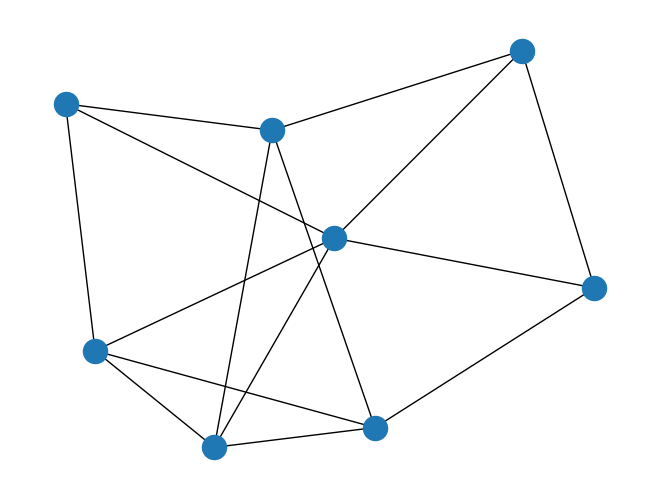

In [1]:
import data.random_graph_generator as rgg 
import networkx as nx

#For the test, let's take a possible range of sizes of graphs 
sizes = range(3,11)

#Erdos-Renyi model generator
ergen = rgg.ERGenerator(sizes) #Let's use alpha = 1.3 the default value
G = ergen.generate()
nx.draw(G)

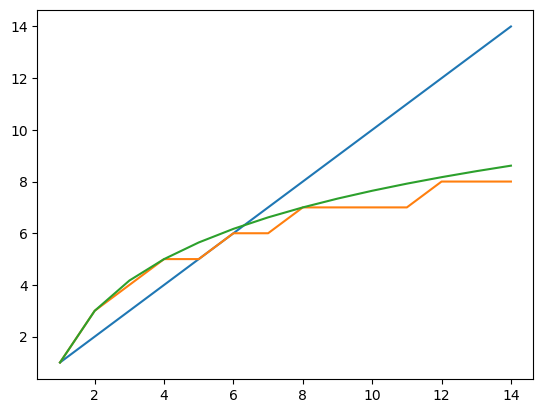

In [8]:
#Original git parameters 
import numpy as np 
import matplotlib.pyplot as plt 
M, FM = [], []
for n in range(1,15) : 
    m = int(2 * np.log2(n))+1
    fm = (2 * np.log2(n)) +1 
    M.append(m)
    FM.append(fm)
    
plt.plot(list(range(1,15)),list(range(1,15)))
plt.plot(list(range(1,15)), M)
plt.plot(list(range(1,15)), FM)
plt.show()

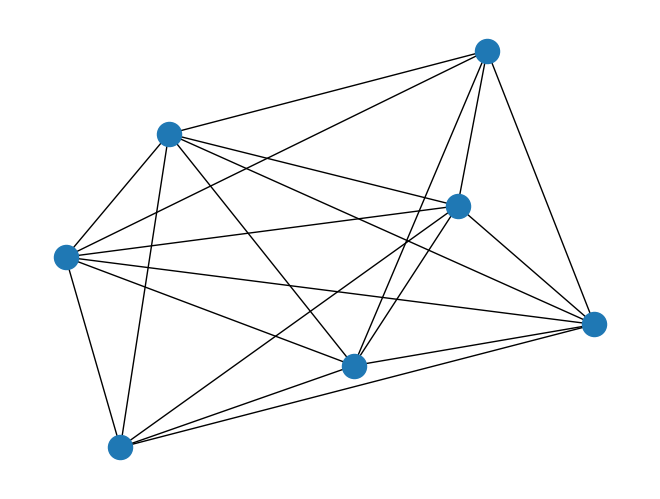

In [16]:
#Barabasi Albert model generator
bagen = rgg.BAGenerator(sizes)
G = bagen.generate()
nx.draw(G)

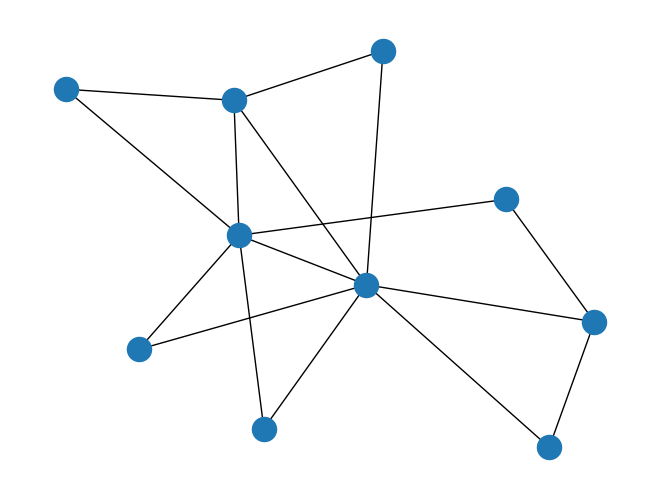

In [18]:
plcgen = rgg.PLCGenerator(sizes) #max_triangle_prob: float = 0.5
G = plcgen.generate()
nx.draw(G)

## DataLoaders 

In [17]:
from data.loaders import gen_data_loaders
from data.random_graph_generator import random_generator
gen = random_generator(list(range(3,10)),3)
loaders = gen_data_loaders(3,2,generator=gen)

for i in loaders:
    print(i)
    print(f"Printing loader length : {len(i)}")

print("using zip methods from original git")
n = 1
for batch_target, batch_neg_target, batch_neg_query in zip(*loaders):
    print(f"cycle : {n}")
    n+=1
    print(f"Printing loader length : {len(loaders[0])}")
    
    print("batch_target : ")
    print(batch_target)
    
    print("batch_neg_target : ")
    print(batch_neg_target)

    
    print("batch_neg_query : ")
    print(batch_neg_query)

print("end")

Printing loader length : 3
Printing loader length : 3
[None, None, None]
Printing loader length : 3
using zip methods from original git
cycle : 1
Printing loader length : 3
batch_target : 
Batch(G=[1], batch=[5], edge_index=[2, 18], edge_label_index=[2, 18], node_label_index=[5])
batch_neg_target : 
Batch(G=[1], batch=[6], edge_index=[2, 12], edge_label_index=[2, 12], node_label_index=[6])
batch_neg_query : 
None
cycle : 2
Printing loader length : 3
batch_target : 
Batch(G=[1], batch=[5], edge_index=[2, 8], edge_label_index=[2, 8], node_label_index=[5])
batch_neg_target : 
Batch(G=[1], batch=[6], edge_index=[2, 16], edge_label_index=[2, 16], node_label_index=[6])
batch_neg_query : 
None
cycle : 3
Printing loader length : 3
batch_target : 
Batch(G=[1], batch=[7], edge_index=[2, 16], edge_label_index=[2, 16], node_label_index=[7])
batch_neg_target : 
Batch(G=[1], batch=[7], edge_index=[2, 14], edge_label_index=[2, 14], node_label_index=[7])
batch_neg_query : 
None
end


> Important thing to note : If the length of the generator (`random_generator(sizes,length)`) is greater than the epoch size (`gen_data_loaders(epoch_size,batc_hsize,generator)`) the loader is stuck in an infinite loop ! 

batch_target : Batch(G=[1], batch=[7], edge_index=[2, 16], edge_label_index=[2, 16], node_label_index=[7])
length : 5
type : <class 'deepsnap.batch.Batch'>
number of graphs : 1
As a list : 
[('G', [<networkx.classes.graph.Graph object at 0x143fb5a50>]), ('batch', tensor([0, 0, 0, 0, 0, 0, 0])), ('edge_index', tensor([[0, 0, 0, 1, 3, 3, 4, 4, 1, 2, 3, 3, 5, 6, 5, 6],
        [1, 2, 3, 3, 5, 6, 5, 6, 0, 0, 0, 1, 3, 3, 4, 4]])), ('edge_label_index', tensor([[0, 0, 0, 1, 3, 3, 4, 4, 1, 2, 3, 3, 5, 6, 5, 6],
        [1, 2, 3, 3, 5, 6, 5, 6, 0, 0, 0, 1, 3, 3, 4, 4]])), ('node_label_index', tensor([0, 1, 2, 3, 4, 5, 6]))]
list length : 5
Graph : Graph with 7 nodes and 8 edges
Graph edges : [(0, 1), (0, 2), (0, 3), (1, 3), (3, 5), (3, 6), (4, 5), (4, 6)]
Graph repr : None


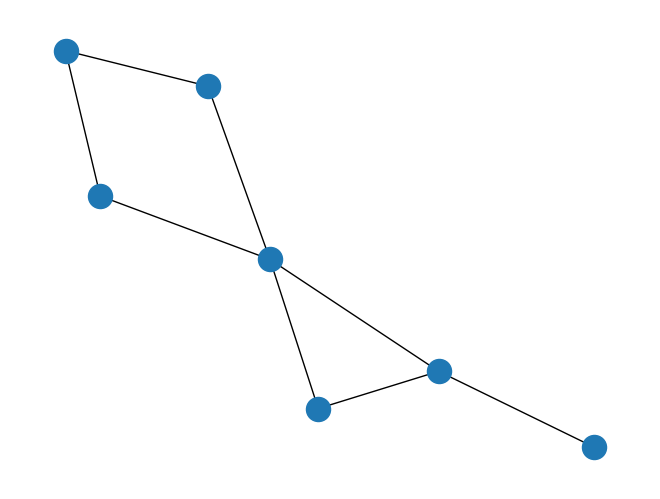

In [18]:
import networkx as nx
print(f"batch_target : {batch_target}\nlength : {len(batch_target)}\ntype : {type(batch_target)}") 
print(f"number of graphs : {batch_target.num_graphs}\nAs a list : \n{list(batch_target)}\nlist length : {len(list(batch_target))}")
G = batch_target.G[0]
print(f"Graph : {G}\nGraph edges : {G.edges}\nGraph repr : {nx.draw(G)}")